# Imports

In [1]:
#Ticker Codes
from nsetools import Nse
# Raw Package
import numpy as np
import pandas as pd
#Data Source
import yfinance as yf

#pywidget
import ipywidgets as widget
# from IPython.display import display
import talib
# import trendln
# import plotly.graph_objects as go
# import plotly.express as px
import matplotlib.pyplot as plt
import mplfinance as mpf
import datetime
import time

# from helper_functions import get_user_inputs, create_top_line, create_bottom_line, pull_price_data, plot_graph, isSupport, isResistance, isFarFromLevel, finding_signals_from_data, is_consolidating, is_breaking_out, technical_scoring_function, long_term_trend_scoring_function
from helper_functions import *
import helper_functions
import importlib
importlib.reload(helper_functions)
%matplotlib inline

# Test Functions

Functions have been moved to "helper_functions.py"

In [3]:
# print('Select company name from drop down')
# nse = Nse()
# company_dict = nse.get_stock_codes()
# stock_ticker = widget.Dropdown(options=list(company_dict.values())[1:], value=  '20 Microns Limited', description='Stock:')
# stock_ticker

In [10]:
# #Backtesting function
# def backtest_function(mode = 'all', period = -2, live = 'no', csv_file = 'n50.csv', cur_thresh = 5):
#     tpm = 3 
#     if(mode == 'all'):
#         n50 = pd.read_csv(csv_file)
#         nifty50 = []
#         for t in n50['Symbol'].values:
#             nifty50.append(t+'.NS')
#         for t in nifty50:
#             ticker = t
#             #print(live)
#             data = pull_price_data(live, t, mode = 'scoring')
#             if(live == 'no'):
#                 data, levels, plot_sup_res = finding_signals_from_data(data, time_period_multiplier = 1)
#             else:
#                 data, levels, plot_sup_res = finding_signals_from_data(data, time_period_multiplier = tpm)
#             data = plot_graph(data, g_type, plot_sup_res, mode = 'scoring')
            
#             technical_score_column_list = []
#             for col in data.columns:
#                 if(col.startswith('final_score_technical')):
#                     technical_score_column_list.append(col)

#             backtest_df = data.copy()
#             long_profit_loss_calculation_df = pd.DataFrame(columns = ['Buy Date', 'Buy Price', 'Buy Signal', 
#                                                                       'isDone', 'Sell Date', 'Sell Price',
#                                                                       'Stop Loss', 'Target', 'Profit Percentage'])
#             if(live == 'yes'):
#                 technical_score_column_list.remove('final_score_technical_DOJI-')
#                 technical_score_column_list.remove('final_score_technical_DOJI+')
#             period = 2
#             for i in range(0 , len(data) - 1, 1):
#                 #Dropping doji for live data
#                 #if(live=='yes'):
#                 #    backtest_df.drop(columns = ['final_score_technical_DOJI-', 'final_score_technical_DOJI+'], inplace = True)

#                 #df of 2 days to match techincal scoring function      
#                 two_day_score = backtest_df.iloc[i:i+2]

#                 # Adjusting score for volume
#                 if(sum(two_day_score.drop(columns = ['final_score_technical_Volume']).sum(axis = 1).values ) > 0):
#                     if(two_day_score['final_score_technical_Volume'].isna().sum() != abs(period)):
#                         current_score = sum(two_day_score[technical_score_column_list].drop(columns = ['final_score_technical_Volume']).sum(axis = 1)) + 1
#                     else:
#                         current_score = sum(two_day_score[technical_score_column_list].drop(columns = ['final_score_technical_Volume']).sum(axis = 1))
#                 elif(sum(two_day_score.drop(columns = ['final_score_technical_Volume']).sum(axis = 1).values ) < 0):
#                     if(two_day_score['final_score_technical_Volume'].isna().sum() != abs(period)):
#                         current_score = sum(two_day_score[technical_score_column_list].drop(columns = ['final_score_technical_Volume']).sum(axis = 1)) - 1
#                     else:
#                         current_score = sum(two_day_score[technical_score_column_list].drop(columns = ['final_score_technical_Volume']).sum(axis = 1))
#                 current_market_price = two_day_score['Adj Close'].iloc[-1]
#                 current_date = two_day_score.index[-1]
#                 if(live == 'yes'):
#                     stop_loss_multiplier = 0.995
#                     target_multiplier = 1.01
#                 else:
#                     stop_loss_multiplier = 0.95
#                     target_multiplier = 1.1
#                 if(current_score >= cur_thresh):
#                     temp_row = {"Buy Date": current_date, "Buy Price": current_market_price, "Buy Signal" : current_score, 
#                                 "isDone" : 0, "Stop Loss": current_market_price * stop_loss_multiplier, 
#                                 "Target" : current_market_price * target_multiplier, "Threshold" : cur_thresh,
#                                "ticker" : t}
#                     long_profit_loss_calculation_df = long_profit_loss_calculation_df.append(temp_row, ignore_index = True)

#                 #Checking if price is above or below SL. Target
#                 if(len(long_profit_loss_calculation_df) > 0):
#                     to_be_checked_df = long_profit_loss_calculation_df[long_profit_loss_calculation_df['isDone'] == 0]
#                     for j in (to_be_checked_df.index):

#                         if(to_be_checked_df.loc[j]['Target'] < current_market_price):
#                             long_profit_loss_calculation_df.loc[j,"isDone"] = 1
#                             long_profit_loss_calculation_df.loc[j,"Sell Date"] = current_date
#                             long_profit_loss_calculation_df.loc[j,"Sell Price"] = current_market_price
#                             long_profit_loss_calculation_df.loc[j,"Profit Percentage"] = ((current_market_price - to_be_checked_df.loc[j]['Buy Price'])/to_be_checked_df.loc[j]['Buy Price'])*100
#                         elif(to_be_checked_df.loc[j]['Stop Loss'] > current_market_price):
#                             long_profit_loss_calculation_df.loc[j,"isDone"] = -1
#                             long_profit_loss_calculation_df.loc[j,"Sell Date"] = current_date
#                             long_profit_loss_calculation_df.loc[j,"Sell Price"] = current_market_price
#                             long_profit_loss_calculation_df.loc[j,"Profit Percentage"] = ((current_market_price - to_be_checked_df.loc[j]['Buy Price'])/to_be_checked_df.loc[j]['Buy Price'])*100
#             break
        
#         overall_profit = long_profit_loss_calculation_df['Profit Percentage'].sum()
#         good_calls = (len(long_profit_loss_calculation_df[long_profit_loss_calculation_df['Profit Percentage'] > 0]) - len(long_profit_loss_calculation_df[long_profit_loss_calculation_df['Profit Percentage'] < 0]))/len(long_profit_loss_calculation_df)
#         return(long_profit_loss_calculation_df, overall_profit, good_calls)
#     else:
#         print("else")
#         ticker = t = mode
#         data = pull_price_data(live, t, mode = 'scoring')
#         if(live == 'no'):
#             data, levels, plot_sup_res = finding_signals_from_data(data, time_period_multiplier = 1)
#         else:
#             data, levels, plot_sup_res = finding_signals_from_data(data, time_period_multiplier = tpm)
#         data = plot_graph(data, g_type, mode = 'scoring')

#         technical_score_column_list = []
#         for col in data.columns:
#             if(col.startswith('final_score_technical')):
#                 technical_score_column_list.append(col)

#         backtest_df = data.copy()
#         long_profit_loss_calculation_df = pd.DataFrame(columns = ['Buy Date', 'Buy Price', 'Buy Signal', 
#                                                                   'isDone', 'Sell Date', 'Sell Price',
#                                                                   'Stop Loss', 'Target', 'Profit Percentage'])
#         #print(long_profit_loss_calculation_df)
#         if(live == 'yes'):
#             technical_score_column_list.remove('final_score_technical_DOJI-')
#             technical_score_column_list.remove('final_score_technical_DOJI+')
#         period = 2
#         for i in range(0 , len(data) - 1, 1):
#             #Dropping doji for live data
#             #if(live=='yes'):
#             #    backtest_df.drop(columns = ['final_score_technical_DOJI-', 'final_score_technical_DOJI+'], inplace = True)

#             #df of 2 days to match techincal scoring function      
#             two_day_score = backtest_df.iloc[i:i+2]

#             # Adjusting score for volume
#             if(sum(two_day_score.drop(columns = ['final_score_technical_Volume']).sum(axis = 1).values ) > 0):
#                 if(two_day_score['final_score_technical_Volume'].isna().sum() != abs(period)):
#                     current_score = sum(two_day_score[technical_score_column_list].drop(columns = ['final_score_technical_Volume']).sum(axis = 1)) + 1
#                 else:
#                     current_score = sum(two_day_score[technical_score_column_list].drop(columns = ['final_score_technical_Volume']).sum(axis = 1))
#             elif(sum(two_day_score.drop(columns = ['final_score_technical_Volume']).sum(axis = 1).values ) < 0):
#                 if(two_day_score['final_score_technical_Volume'].isna().sum() != abs(period)):
#                     current_score = sum(two_day_score[technical_score_column_list].drop(columns = ['final_score_technical_Volume']).sum(axis = 1)) - 1
#                 else:
#                     current_score = sum(two_day_score[technical_score_column_list].drop(columns = ['final_score_technical_Volume']).sum(axis = 1))
#             current_market_price = two_day_score['Adj Close'].iloc[-1]
#             current_date = two_day_score.index[-1]
#             if(live == 'yes'):
#                 stop_loss_multiplier = 0.995
#                 target_multiplier = 1.01
#             else:
#                 stop_loss_multiplier = 0.95
#                 target_multiplier = 1.1
#             if(current_score >= cur_thresh):
#                 temp_row = {"Buy Date": current_date, "Buy Price": current_market_price, "Buy Signal" : current_score, 
#                             "isDone" : 0, "Stop Loss": current_market_price * stop_loss_multiplier, 
#                             "Target" : current_market_price * target_multiplier, "Threshold" : cur_thresh,
#                            "ticker" : t}
#                 long_profit_loss_calculation_df = long_profit_loss_calculation_df.append(temp_row, ignore_index = True)

#             #Checking if price is above or below SL. Target
#             if(len(long_profit_loss_calculation_df) > 0):
#                 to_be_checked_df = long_profit_loss_calculation_df[long_profit_loss_calculation_df['isDone'] == 0]
#                 for j in (to_be_checked_df.index):

#                     if(to_be_checked_df.loc[j]['Target'] < current_market_price):
#                         long_profit_loss_calculation_df.loc[j,"isDone"] = 1
#                         long_profit_loss_calculation_df.loc[j,"Sell Date"] = current_date
#                         long_profit_loss_calculation_df.loc[j,"Sell Price"] = current_market_price
#                         long_profit_loss_calculation_df.loc[j,"Profit Percentage"] = ((current_market_price - to_be_checked_df.loc[j]['Buy Price'])/to_be_checked_df.loc[j]['Buy Price'])*100
#                     elif(to_be_checked_df.loc[j]['Stop Loss'] > current_market_price):
#                         long_profit_loss_calculation_df.loc[j,"isDone"] = -1
#                         long_profit_loss_calculation_df.loc[j,"Sell Date"] = current_date
#                         long_profit_loss_calculation_df.loc[j,"Sell Price"] = current_market_price
#                         long_profit_loss_calculation_df.loc[j,"Profit Percentage"] = ((current_market_price - to_be_checked_df.loc[j]['Buy Price'])/to_be_checked_df.loc[j]['Buy Price'])*100
            
#         #print(len(long_profit_loss_calculation_df))
#         #print(long_profit_loss_calculation_df)
#         overall_profit = long_profit_loss_calculation_df['Profit Percentage'].sum()
#         good_calls = (len(long_profit_loss_calculation_df[long_profit_loss_calculation_df['Profit Percentage'] > 0]) - len(long_profit_loss_calculation_df[long_profit_loss_calculation_df['Profit Percentage'] < 0]))/len(long_profit_loss_calculation_df)
#     return(long_profit_loss_calculation_df, overall_profit, good_calls)


# Running functions

Shows indicators for given stock_ticker

Do you want live data?: yes/ no/ max
no
Enter period of months6
Enter interval(1m, 1d, 1wk)1d
[*********************100%***********************]  1 of 1 completed
2022-07-22 00:00:00
Is Consolidating:  False
Is Breaking Out:  False
[(2, 410.70001220703125), (6, 392.0), (20, 319.1000061035156), (23, 344.0), (48, 333.0), (100, 305.0)]


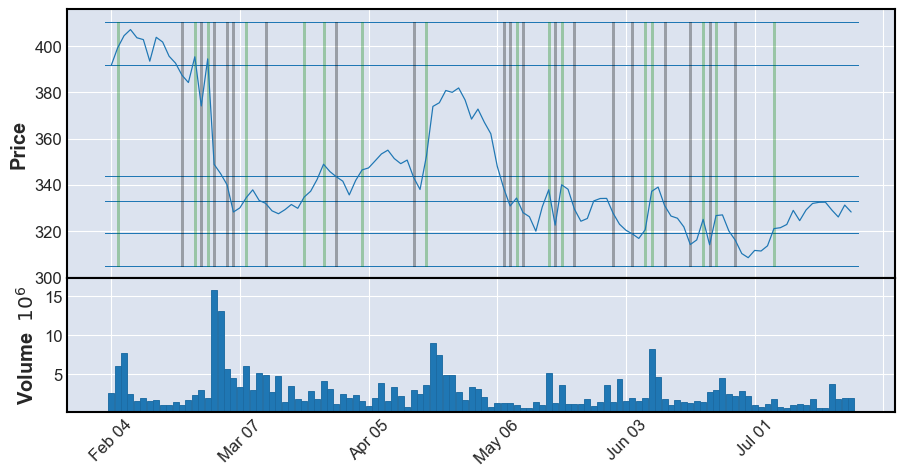

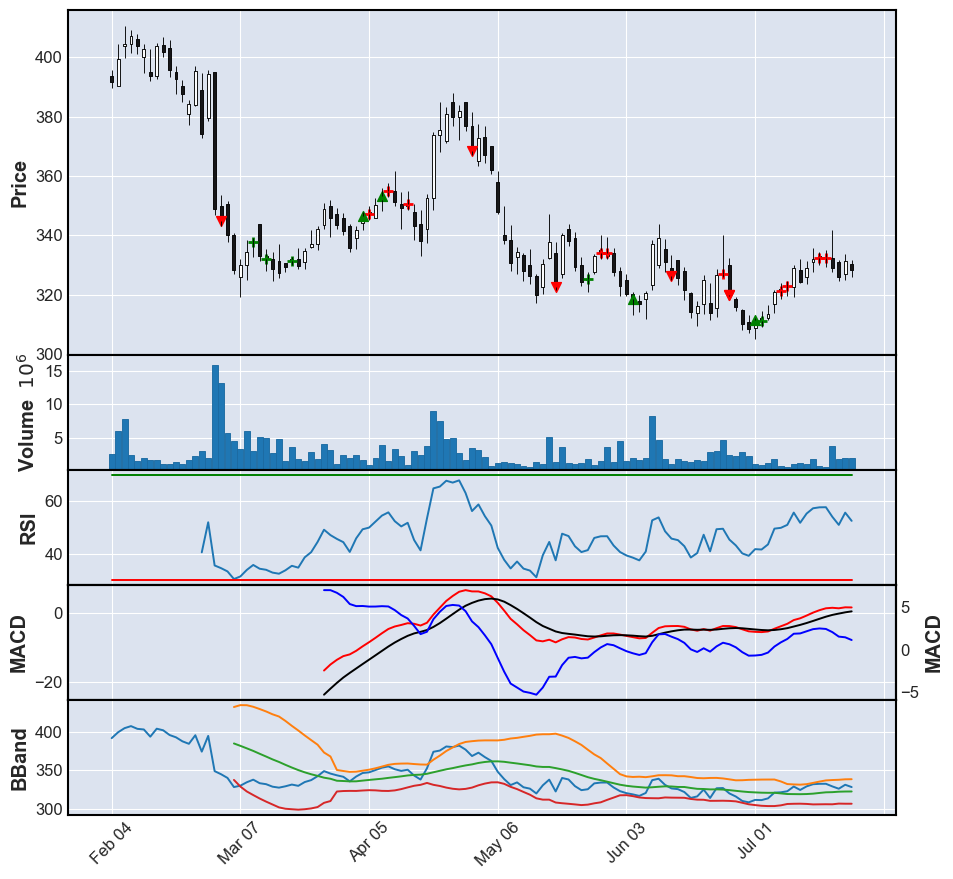

In [2]:
#Getting data for single stock
live, g_type = get_user_inputs()
data = pull_price_data(live, stock_ticker = 'BIOCON.NS')
print(data.index[-1])

if(live == 'yes'):
    print("Is Consolidating: ",is_consolidating(data, percentage=0.5))
else:
    print("Is Consolidating: ",is_consolidating(data))

    
if(live == 'yes'):
    print("Is Breaking Out: ",is_breaking_out(data, percentage=2))
else:
    print("Is Breaking Out: ",is_breaking_out(data))    

if(live == 'no' or live == 'max'):
    data, levels, plot_sup_res = finding_signals_from_data(data, time_period_multiplier = 1)
else:
    data, levels, plot_sup_res = finding_signals_from_data(data, time_period_multiplier = 3)
print(levels)
data = data[data['Close'].notna()]
plot_graph(data, g_type='line', mode = 'quick', plo t_sup_res = plot_sup_res)
data = plot_graph(data, g_type, plot_sup_res = plot_sup_res)

Dataframe returned from the technical_scoring_function

In [18]:
a, b = technical_scoring_function(mode = 'INTC', live = 'no')
a

[*********************100%***********************]  1 of 1 completed


,final_score_technical_Volume,final_score_technical__RSI+,final_score_technical__RSI-,final_score_technical_MACD+,final_score_technical_MACD-,final_score_technical_BB+,final_score_technical_BB-,final_score_technical_supres+,final_score_technical_supres-,final_score_technical_CDL3INSIDE-,...,final_score_technical_CDLSEPARATINGLINES-,final_score_technical_CDL3INSIDE+,final_score_technical_CDL3OUTSIDE+,final_score_technical_CDLHAMMER+,final_score_technical_CDLINVERTEDHAMMER+,final_score_technical_CDLMORNINGSTAR+,final_score_technical_CDLSEPARATINGLINES+,final_score_technical_CDLUNIQUE3RIVER+,final_score_technical_DOJI-,final_score_technical_DOJI+
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-14,1.0,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# All scoring function

Give short term trend reversals. <br>
Values over 4.0 can be a positive sign<br>
Values below -4.0 can be a negative sign

In [6]:
#Scoring function (Gives Signal of Reversal)
# personal list = ['BIOCON.NS','COLPAL.NS']
start = datetime.datetime.now()
print(datetime.datetime.now())

pos_score_company, neg_score_company = technical_scoring_function(live = 'no', csv_file = 'n50.csv') #live, period, ticker as params
print('All Done')

pos_score_company = sorted(pos_score_company.items(), key=lambda x: x[1], reverse = True)
#neg_score_company = sorted(neg_score_company.items(), key=lambda x: x[1])


print(pos_score_company,'\n\n\n')
#print(neg_score_company)
print(datetime.datetime.now() - start)

2022-07-22 01:20:57.483917
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[******

Gives a long term trend<br>
More positive scores can be associated with a relatively upwards trend<br>
More negative scores can be associated with a relatively downwards trend

In [4]:
#Scoring function (Gives Longterm Trend)
print(datetime.datetime.now())

long_neg_score_company, long_pos_score_company = long_term_trend_scoring_function(live = 'no', csv_file = 'n50.csv') #live, period, ticker as params
print('All Done')

long_pos_score_company = sorted(long_pos_score_company.items(), key=lambda x: x[1], reverse = True)
long_neg_score_company = sorted(long_neg_score_company.items(), key=lambda x: x[1])


print(long_pos_score_company,'\n\n\n')
print(long_neg_score_company)



2022-07-22 01:17:36.640276
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[******

# My list

The above 2 functions can also be run with a specific list of tickers. 

In [35]:
#Scoring function (Gives Signal of Reversal)
# personal list = ['BIOCON.NS','COLPAL.NS']
pos_score_company, neg_score_company = technical_scoring_function(mode = "list") #live, period, ticker as params
print('All Done')

pos_score_company = sorted(pos_score_company.items(), key=lambda x: x[1], reverse = True)
neg_score_company = sorted(neg_score_company.items(), key=lambda x: x[1])


print(pos_score_company,'\n\n\n')
print(neg_score_company)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
All Done
[('BIOCON.NS', 0.0), ('COLPAL.NS', 0.0)] 



[]


In [36]:
#Scoring function (Gives Longterm Trend)
neg_score_company, pos_score_company = long_term_trend_scoring_function(mode = 'list') #live, period, ticker as params
print('All Done')

pos_score_company = sorted(pos_score_company.items(), key=lambda x: x[1], reverse = True)
neg_score_company = sorted(neg_score_company.items(), key=lambda x: x[1])


print(pos_score_company,'\n\n\n')
print(neg_score_company)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
All Done
[] 



[('BIOCON.NS', -0.5), ('COLPAL.NS', 4.5)]


### Loops for continuous running for live data

Works for live data when markets are open, else will show the same outputs everytime. 


In [25]:
def update():
    import time
    from IPython.display import clear_output
    while True:
        pos_score_company, neg_score_company = technical_scoring_function( live = 'yes', csv_file = 'n50.csv') #live, period, ticker as params
        #pos_score_company = sorted(pos_score_company.items(), key=lambda x: x[1], reverse = True)
        #neg_score_company = sorted(neg_score_company.items(), key=lambda x: x[1])

        #clear_output(wait=True)
        print(pos_score_company, datetime.datetime.now().strftime("%H:%M:%S"))
        #print(neg_score_company)
        time.sleep(29)

update()

[*********************100%***********************]  1 of 1 completed
Error with ACC.NS
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Error with APOLLOHOSP.NS
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 c

KeyboardInterrupt: 

In [38]:
# 
def update():
    import time
    from IPython.display import clear_output
    while True:
        pos_score_company, neg_score_company = long_term_trend_scoring_function(mode = "list", live = 'yes') #live, period, ticker as params
        #pos_score_company = sorted(pos_score_company.items(), key=lambda x: x[1], reverse = True)
        #neg_score_company = sorted(neg_score_company.items(), key=lambda x: x[1])

        #clear_output(wait=True)
        print(pos_score_company, datetime.datetime.now().strftime("%H:%M:%S"))
        #print(neg_score_company)
        time.sleep(3)

update()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'BIOCON.NS': 1.5, 'COLPAL.NS': 9.0} 14:53:46
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'BIOCON.NS': 1.5, 'COLPAL.NS': 9.0} 14:53:51
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'BIOCON.NS': 1.5, 'COLPAL.NS': 9.0} 14:53:55
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'BIOCON.NS': 1.5, 'COLPAL.NS': 9.0} 14:54:00
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'BIOCON.NS': 1.5, 'COLPAL.NS': 9.0} 14:54:05


KeyboardInterrupt: 

# Backtesting

In [2]:
backtest_dict = {}
for i in range(2, 31):
    print(i, "\n\n\n")
    td = backtest(period = i, csv_file = 'n50.csv')
    avg = sum(list(td.values())) / len(list(td.values()))
    backtest_dict[i] = [avg, td]

2 



[*********************100%***********************]  1 of 1 completed
ACC.NS Done
[*********************100%***********************]  1 of 1 completed
ABBOTINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIENT.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIGREEN.NS Done
[*********************100%***********************]  1 of 1 completed
ADANITRANS.NS Done
[*********************100%***********************]  1 of 1 completed
ALKEM.NS Done
[*********************100%***********************]  1 of 1 completed
AMBUJACEM.NS Done
[*********************100%***********************]  1 of 1 completed
APOLLOHOSP.NS Done
[*********************100%***********************]  1 of 1 completed
AUROPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
DMART.NS Done
[*********************100%***********************]  1 of 1 completed
BAJAJHLDNG.NS Done
[*********************100%********************

[*********************100%***********************]  1 of 1 completed
SBICARD.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
TORNTPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
UBL.NS Done
[*********************100%***********************]  1 of 1 completed
MCDOWELL-N.NS Done
[*********************100%***********************]  1 of 1 completed
VEDL.NS Done
[*********************100%***********************]  1 of 1 completed
YESBANK.NS Done
4 



[*********************100%***********************]  1 of 1 completed
ACC.NS Done
[*********************100%***********************]  1 of 1 completed
ABBOTINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIENT.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIGREEN.NS Done
[*********************100%***********************]  1 of 

[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
PETRONET.NS Done
[*********************100%***********************]  1 of 1 completed
PIDILITIND.NS Done
[*********************100%***********************]  1 of 1 completed
PEL.NS Done
[*********************100%***********************]  1 of 1 completed
PGHH.NS Done
[*********************100%***********************]  1 of 1 completed
PNB.NS Done
[*********************100%***********************]  1 of 1 completed
SBICARD.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
TORNTPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
UBL.NS Done
[*********************100%***********************]  1 of 1 completed
MCDO

[*********************100%***********************]  1 of 1 completed
INDIGO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3073
JUBLFOOD.NS Done
[*********************100%***********************]  1 of 1 completed
LTI.NS Done
[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4527
PETRONET.NS Done
[*********************100%***********************]  1 of 1 completed
PIDILITIND.NS Done
[*********************1

[*********************100%***********************]  1 of 1 completed
HDFCAMC.NS Done
[*********************100%***********************]  1 of 1 completed
HAVELLS.NS Done
[*********************100%***********************]  1 of 1 completed
HINDPETRO.NS Done
[*********************100%***********************]  1 of 1 completed
ICICIGI.NS Done
[*********************100%***********************]  1 of 1 completed
ICICIPRULI.NS Done
[*********************100%***********************]  1 of 1 completed
IGL.NS Done
[*********************100%***********************]  1 of 1 completed
INDUSTOWER.NS Done
[*********************100%***********************]  1 of 1 completed
NAUKRI.NS Done
[*********************100%***********************]  1 of 1 completed
INDIGO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3073
JUBLFOOD.NS Done
[*********************100%***********************]  1 of 1 completed
LTI.NS Done
[*********************100%*****************

Could not perform 4986
BOSCHLTD.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
DLF.NS Done
[*********************100%***********************]  1 of 1 completed
DABUR.NS Done
[*********************100%***********************]  1 of 1 completed
GAIL.NS Done
[*********************100%***********************]  1 of 1 completed
GODREJCP.NS Done
[*********************100%***********************]  1 of 1 completed
HDFCAMC.NS Done
[*********************100%***********************]  1 of 1 completed
HAVELLS.NS Done
[*********************100%***********************]  1 of 1 completed
HINDPETRO.NS Done
[*********************100%***********************]  1 of 1 completed
ICICIGI.NS Done
[*********************100%***

[*********************100%***********************]  1 of 1 completed
AMBUJACEM.NS Done
[*********************100%***********************]  1 of 1 completed
APOLLOHOSP.NS Done
[*********************100%***********************]  1 of 1 completed
AUROPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
DMART.NS Done
[*********************100%***********************]  1 of 1 completed
BAJAJHLDNG.NS Done
[*********************100%***********************]  1 of 1 completed
BANDHANBNK.NS Done
[*********************100%***********************]  1 of 1 completed
BERGEPAINT.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4512
BIOCON.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4986
BOSCHLTD.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[

[*********************100%***********************]  1 of 1 completed
TORNTPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
UBL.NS Done
[*********************100%***********************]  1 of 1 completed
MCDOWELL-N.NS Done
[*********************100%***********************]  1 of 1 completed
VEDL.NS Done
[*********************100%***********************]  1 of 1 completed
YESBANK.NS Done
15 



[*********************100%***********************]  1 of 1 completed
ACC.NS Done
[*********************100%***********************]  1 of 1 completed
ABBOTINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIENT.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIGREEN.NS Done
[*********************100%***********************]  1 of 1 completed
ADANITRANS.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1615
ALKEM.NS Done
[*********************100%******

[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2750
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4523
Could not perform 4527
PETRONET.NS Done
[*********************100%***********************]  1 of 1 completed
PIDILITIND.NS Done
[*********************100%***********************]  1 of 1 completed
PEL.NS Done
[*********************100%***********************]  1 of 1 completed
PGHH.NS Done
[*********************100%****************

[*********************100%***********************]  1 of 1 completed
DLF.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4970
Could not perform 4971
DABUR.NS Done
[*********************100%***********************]  1 of 1 completed
GAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4974
GODREJCP.NS Done
[*********************100%***********************]  1 of 1 completed
HDFCAMC.NS Done
[*********************100%***********************]  1 of 1 completed
HAVELLS.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6658
HINDPETRO.NS Done
[*********************100%***********************]  1 of 1 completed
ICICIGI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1425
ICICIPRULI.NS Done
[*********************100%***********************]  1 of 1 completed
IGL.NS Done
[*********************100%****************

[*********************100%***********************]  1 of 1 completed
ADANIENT.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIGREEN.NS Done
[*********************100%***********************]  1 of 1 completed
ADANITRANS.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1615
ALKEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
AMBUJACEM.NS Done
[*********************100%***********************]  1 of 1 completed
APOLLOHOSP.NS Done
[*********************100%***********************]  1 of 1 completed
AUROPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1308
DMART.NS Done
[*********************100%***********************]  1 of 1 completed
BAJAJHLDNG.NS Done
[*********************100%***********************]  1 of 1 completed
BANDHANBNK.NS Done
[*********************100%***********************]  1 of 1 compl

[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2746
Could not perform 2750
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4523
Could not perform 4527
PETRONET.NS Done
[*********************100%***********************]  1 of 1 completed
PIDILITIND.NS Done
[*********************100%***********************]  1 of 1 completed
PEL.NS Done
[*********************100%***********************]  1 of 1 completed
PGHH.NS Done
[*********************100%***********************]  1 of 1 completed
PNB.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 566
SBICARD.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS

[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3677
DLF.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4965
Could not perform 4970
Could not perform 4971
DABUR.NS Done
[*********************100%***********************]  1 of 1 completed
GAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4974
GODREJCP.NS Done
[*********************100%***********************]  1 of 1 completed
HDFCAMC.NS Done
[*********************100%***********************]  1 of 1 completed
HAVELLS.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6648
Could not perform 6658
HINDPETRO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1169
ICICIGI.NS Done
[*********************100%***********************]  1 of 1

[*********************100%***********************]  1 of 1 completed
Could not perform 3431
UBL.NS Done
[*********************100%***********************]  1 of 1 completed
MCDOWELL-N.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6426
Could not perform 6429
Could not perform 6430
VEDL.NS Done
[*********************100%***********************]  1 of 1 completed
YESBANK.NS Done
25 



[*********************100%***********************]  1 of 1 completed
ACC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3248
ABBOTINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIENT.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIGREEN.NS Done
[*********************100%***********************]  1 of 1 completed
ADANITRANS.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1615
ALKEM.NS Done
[****

[*********************100%***********************]  1 of 1 completed
Could not perform 1169
ICICIGI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1425
ICICIPRULI.NS Done
[*********************100%***********************]  1 of 1 completed
IGL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2348
INDUSTOWER.NS Done
[*********************100%***********************]  1 of 1 completed
NAUKRI.NS Done
[*********************100%***********************]  1 of 1 completed
INDIGO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3060
Could not perform 3073
JUBLFOOD.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1466
LTI.NS Done
[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[********************

[*********************100%***********************]  1 of 1 completed
ADANIGREEN.NS Done
[*********************100%***********************]  1 of 1 completed
ADANITRANS.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1615
ALKEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
AMBUJACEM.NS Done
[*********************100%***********************]  1 of 1 completed
APOLLOHOSP.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6574
AUROPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1308
DMART.NS Done
[*********************100%***********************]  1 of 1 completed
BAJAJHLDNG.NS Done
[*********************100%***********************]  1 of 1 completed
BANDHANBNK.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4947
BERGEPAINT.NS Done
[***************

[*********************100%***********************]  1 of 1 completed
INDIGO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3060
Could not perform 3073
JUBLFOOD.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1457
Could not perform 1466
LTI.NS Done
[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2746
Could not perform 2750
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%**********

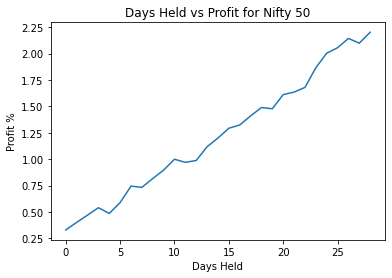

In [18]:
avgs = [ ]
ns = []
i = 0
for el in list(backtest_dict.values()):
    avgs.append(el[0])
    ns.append(i)
    i += 1
plt.plot(ns, avgs)
plt.title("Days Held vs Profit for Nifty 50")
plt.xlabel("Days Held")
plt.ylabel("Profit %")
plt.show()

2 



[*********************100%***********************]  1 of 1 completed
ACC.NS Done
[*********************100%***********************]  1 of 1 completed
AUBANK.NS Done
[*********************100%***********************]  1 of 1 completed
AARTIIND.NS Done
[*********************100%***********************]  1 of 1 completed
ABBOTINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIENT.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIGREEN.NS Done
[*********************100%***********************]  1 of 1 completed
ADANIPORTS.NS Done
[*********************100%***********************]  1 of 1 completed
ATGL.NS Done
[*********************100%***********************]  1 of 1 completed
ADANITRANS.NS Done
[*********************100%***********************]  1 of 1 completed
ABCAPITAL.NS Done
[*********************100%***********************]  1 of 1 completed
ABFRL.NS Done
[*********************100%***********************]  1

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
CONCOR.NS Done
[*********************100%****

[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%***********************]  1 of 1 completed
OBEROIRLTY.NS Done
[*********************100%***********************]  1 of 1 completed
ONGC.NS Done
[*********************100%***********************]  1 of 1 completed
OIL.NS Done
[*********************100%***********************]  1 of 1 completed
PIIND.NS Done
[*********************100%***********************]  1 of 1 completed
PAGEIND.NS Done
[*********************100%***********************]  1 of 1 completed
PETRONET.NS Done
[*********************100%********************

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*********************100%***********************]  1 

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
CONCOR.NS Done
[*********************100%****

[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%***********************]  1 of 1 completed
OBEROIRLTY.NS Done
[*********************100%***********************]  1 of 1 completed
ONGC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3159
OIL.NS Done
[*********************100%***********************]  1 of 1 completed
PIIND.NS Done
[*********************100%***********************]  1 of 1 completed
PAGEIND.NS Done
[********************

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*********************100%***********************]  1 

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
CONCOR.NS Done
[*********************100%****

[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%***********************]  1 of 1 completed
OBEROIRLTY.NS Done
[*********************100%***********************]  1 of 1 completed
ONGC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3159
OIL.NS Done
[*********************100%***********************]  1 of 1 completed
PIIND.NS Done
[*********************100%***********************]  1 of 1 completed
PAGEIND.NS Done
[********************

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*********************100%***********************]  1 

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
CONCOR.NS Done
[******

[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2895
OBEROIRLTY.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6659
ONGC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3159
OIL.NS Done
[*********************100%***********************]  1 o

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*********************100%***********************]  1 

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
CONCOR.NS Done
[******

[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3730
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2895
OBEROIRLTY.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6659
ONGC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3156
Could not perform 3159
OIL.NS Done
[********

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*********************100%***********************]  1 

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
CONCOR.NS Done
[******

[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3730
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2895
OBEROIRLTY.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6659
ONGC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3156
Could not perform 3159
OIL.NS Done
[********

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*********************100%***********************]  1 

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
CONCOR.NS Done
[******

[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3730
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2895
OBEROIRLTY.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6659
ONGC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3156
Could not perform 3159
OIL.NS Done
[********

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*********************100%*****

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
CONCOR.NS Done
[******

[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3730
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2895
OBEROIRLTY.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6659
ONGC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3156
Could not perform 3159
OIL.NS Done
[********

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*********************100%*****

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
CONCOR.NS Done
[******

[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3730
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2895
OBEROIRLTY.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6659
ONGC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3156
Could not perform 3159
OIL.NS Done
[********

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*********************100%*****

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
CONCOR.NS Done
[******

[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4364
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3730
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2895
OBEROIRLTY.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6659
ONGC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3156
Could not perform 315

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*********************100%*****

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
CONCOR.NS Done
[******

[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
MPHASIS.NS Done
[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4364
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3730
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2895
OBEROIRLTY.NS Done
[*********************

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*******

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4972

[*********************100%***********************]  1 of 1 completed
MINDTREE.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
MPHASIS.NS Done
[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4364
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3730
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%*********************

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*******

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4972

[*********************100%***********************]  1 of 1 completed
MINDTREE.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
MPHASIS.NS Done
[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4364
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3730
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
NESTLEIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1164
NAM-INDIA.NS Done
[*********************100%*********************

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 completed
TCS.NS Done
[*******

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Could not perform 6652
Could not perform 6662
MFSL.NS Done
[*********************100%***********************]  1 of 1 completed
MINDTREE.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
MPHASIS.NS Done
[*********************100%***********************]  1 of 1 completed
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4364
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3730
NAVINFLUOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3246
NESTLEIND.NS Done
[*****

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 complet

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Could not perform 4716
MARUTI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6652
Could not perform 6662
MFSL.NS Done
[*********************100%***********************]  1 of 1 completed
MINDTREE.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
MPHASIS.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2750
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4364
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 3730
NAVIN

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 complet

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Could not perform 4716
MARUTI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6652
Could not perform 6662
MFSL.NS Done
[*********************100%***********************]  1 of 1 completed
MINDTREE.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
MPHASIS.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2750
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6605
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4364
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
TATACHEM.NS Done
[*********************100%***********************]  1 of 1 complet

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Could not perform 4716
MARUTI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6652
Could not perform 6662
MFSL.NS Done
[*********************100%***********************]  1 of 1 completed
MINDTREE.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
MPHASIS.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2750
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6605
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4364
NTPC.NS Done
[*********************100%***********************]  1 of 1 completed
Could

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6658
TATACHEM.NS Done
[*********************100%*****************

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4716
MARUTI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6652
Could not perform 6662
MFSL.NS Done
[*********************100%***********************]  1 of 1 completed
MINDTREE.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
MPHASIS.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2750
MUTHOOTFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6605
NATCOPHARM.NS Done
[*********************100%***********************]  1 of 1 completed
NMDC.NS Done
[*********************100%***********************

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6658
TATACHEM.NS Done
[*********************100%*****************

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
M&M.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2974
MANAPPURAM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4716
MARUTI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6652
Could not perform 6662
MFSL.NS Done
[*********************100%***********************]  1 of 1 completed
MINDTREE.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4921
MOTHERSUMI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4966
MPHASIS.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2746
Could not perform 2750
MUTHOOTFIN.NS Done
[***

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6656
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6658
TATACHEM.NS Done
[*******************

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4964
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************

[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
MGL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4015
M&MFIN.NS Done
[*********************100%***********************]  1 of 1 completed
M&M.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2974
MANAPPURAM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4716
MARUTI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6652
Could not perform 6662
MFSL.NS Done
[*********************100%***********************]  1 of 1 completed
MINDTREE.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6656
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6658
TATACHEM.NS Done
[*******************

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

E:\Stock Market Project\Stock-Scoring\helper_functions.py:868: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_Volume'] = data['final_score_technical_Volume'] * data[technical_score_column_list].drop(columns = ['final_score_technical_Volume']).sum(axis = 1).apply(check_total_for_getting_sign_of_volume)




1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4964
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4972
CONCOR.NS D

[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
MGL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4015
M&MFIN.NS Done
[*********************100%***********************]  1 of 1 completed
M&M.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2974
MANAPPURAM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4700
Could not perform 4716
MARUTI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6652
Could not perform 6662
MFSL.NS Done
[*********************100%***********************]  1 of 1 completed
MINDTREE.NS Done
[*********************100%***********************]  1 of 1 comple

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4967
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6656
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6658
TATACHEM.NS Do

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4964
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done
[*********************

[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
MGL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4015
M&MFIN.NS Done
[*********************100%***********************]  1 of 1 completed
M&M.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2974
MANAPPURAM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4700
Could not perform 4716
MARUTI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6652
Could not perform 6662
MFSL.NS Done
[*********************100%***********************]  1 of 1 completed

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4967
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6656
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6658
TATACHEM.NS Do

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4964
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4400
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done

[*********************100%***********************]  1 of 1 completed
LT.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1373
LAURUSLABS.NS Done
[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
MGL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4015
M&MFIN.NS Done
[*********************100%***********************]  1 of 1 completed
M&M.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2974
MANAPPURAM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4700
Could not perform 4716
MARUTI.NS Done
[****

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4967
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6656
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6658
TATACHEM.NS Do

[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4964
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4400
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done

[*********************100%***********************]  1 of 1 completed
LT.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1373
LAURUSLABS.NS Done
[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
MGL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4015
M&MFIN.NS Done
[*********************100%***********************]  1 of 1 completed
M&M.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2974
MANAPPURAM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4700
Could not perform 4716
MARUTI.NS Done
[****

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4967
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6656
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6658
TATACHEM.NS Do

[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4964
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4400
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done

[*********************100%***********************]  1 of 1 completed
LT.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1373
LAURUSLABS.NS Done
[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
MGL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4015
M&MFIN.NS Done
[*********************100%***********************]  1 of 1 completed
M&M.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2974
MANAPPURAM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4700
Could not perform 4716
MARUTI.NS Done
[****

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4967
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6656
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6658
TATACHEM.NS Do

[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4964
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4400
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done

[*********************100%***********************]  1 of 1 completed
LT.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1373
LAURUSLABS.NS Done
[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
MGL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4015
M&MFIN.NS Done
[*********************100%***********************]  1 of 1 completed
M&M.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2974
MANAPPURAM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4700
Could not perform 4716
MARUTI.NS Done
[****

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4967
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6656
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6658
TATACHEM.NS Do

[*********************100%***********************]  1 of 1 completed
Could not perform 6645
Could not perform 6651
BRITANNIA.NS Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4964
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4400
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done

[*********************100%***********************]  1 of 1 completed
LT.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1373
LAURUSLABS.NS Done
[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
MGL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4015
M&MFIN.NS Done
[*********************100%***********************]  1 of 1 completed
M&M.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2974
MANAPPURAM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4700
Could not perform 4716
MARUTI.NS Done
[****

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5218
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4967
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6656
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perf

[*********************100%***********************]  1 of 1 completed
Could not perform 4966
Could not perform 4986
BOSCHLTD.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6645
Could not perform 6651
BRITANNIA.NS Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4964
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4400
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done

[*********************100%***********************]  1 of 1 completed
Could not perform 1457
Could not perform 1466
LTI.NS Done
[*********************100%***********************]  1 of 1 completed
LT.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1373
LAURUSLABS.NS Done
[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
MGL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4015
M&MFIN.NS Done
[*********************100%***********************]  1 of 1 completed
M&M.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2974
MANAPPURAM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*******

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5218
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4967
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6656
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perf

[*********************100%***********************]  1 of 1 completed
Could not perform 4966
Could not perform 4986
BOSCHLTD.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6645
Could not perform 6651
BRITANNIA.NS Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

CESC.NS Done
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted
CADILAHC.NS Could not get data
[*********************100%***********************]  1 of 1 completed
CANBK.NS Done
[*********************100%***********************]  1 of 1 completed
CASTROLIND.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4964
Could not perform 4970
Could not perform 4980
CHOLAFIN.NS Done
[*********************100%***********************]  1 of 1 completed
CIPLA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4968
CUB.NS Done
[*********************100%***********************]  1 of 1 completed
COALINDIA.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4400
Could not perform 4422
COFORGE.NS Done
[*********************100%***********************]  1 of 1 completed
COLPAL.NS Done

[*********************100%***********************]  1 of 1 completed
Could not perform 1457
Could not perform 1466
LTI.NS Done
[*********************100%***********************]  1 of 1 completed
LT.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1373
LAURUSLABS.NS Done
[*********************100%***********************]  1 of 1 completed
LUPIN.NS Done
[*********************100%***********************]  1 of 1 completed
MRF.NS Done
[*********************100%***********************]  1 of 1 completed
MGL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4015
M&MFIN.NS Done
[*********************100%***********************]  1 of 1 completed
M&M.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2974
MANAPPURAM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6057
Could not perform 6058
MARICO.NS Done
[*******

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

SANOFI.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5218
SHREECEM.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 4967
Could not perform 4981
SRTRANSFIN.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5883
SIEMENS.NS Done
[*********************100%***********************]  1 of 1 completed
SBIN.NS Done
[*********************100%***********************]  1 of 1 completed
SAIL.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 6656
SUNPHARMA.NS Done
[*********************100%***********************]  1 of 1 completed
SUNTV.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1704
SYNGENE.NS Done
[*********************100%***********************]  1 of 1 completed
TVSMOTOR.NS Done
[*********************100%***********************]  1 of 1 completed
Could not perf

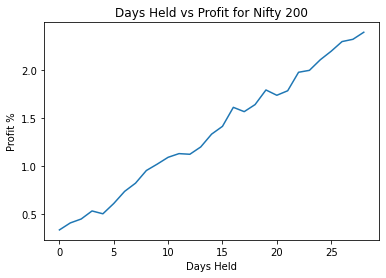

In [20]:
backtest_dict = {}
for i in range(2, 31):
    print(i, "\n\n\n")
    td = backtest(period = i, csv_file = 'n200.csv')
    avg = sum(list(td.values())) / len(list(td.values()))
    backtest_dict[i] = [avg, td]

avgs = [ ]
ns = []
i = 0
for el in list(backtest_dict.values()):
    avgs.append(el[0])
    ns.append(i)
    i += 1
plt.plot(ns, avgs)
plt.title("Days Held vs Profit for Nifty 200")
plt.xlabel("Days Held")
plt.ylabel("Profit %")
plt.show()

In [ ]:
backtest_dict = {}
for i in range(2, 31):
    print(i, "\n\n\n")
    td = backtest(period = i, csv_file = 'NASDAQ 100 Tickers.csv')
    avg = sum(list(td.values())) / len(list(td.values()))
    backtest_dict[i] = [avg, td]

avgs = [ ]
ns = []
i = 0
for el in list(backtest_dict.values()):
    avgs.append(el[0])
    ns.append(i)
    i += 1
plt.plot(ns, avgs)
plt.title("Days Held vs Profit for NASDAQ 100 ")
plt.xlabel("Days Held")
plt.ylabel("Profit %")
plt.show()

2 



[*********************100%***********************]  1 of 1 completed
AAPL Done
[*********************100%***********************]  1 of 1 completed
ABNB Done
[*********************100%***********************]  1 of 1 completed
ADBE Done
[*********************100%***********************]  1 of 1 completed
ADI Done
[*********************100%***********************]  1 of 1 completed
ADP Done
[*********************100%***********************]  1 of 1 completed
ADSK Done
[*********************100%***********************]  1 of 1 completed
Could not perform 15242
AEP Done
[*********************100%***********************]  1 of 1 completed
ALGN Done
[*********************100%***********************]  1 of 1 completed
AMAT Done
[*********************100%***********************]  1 of 1 completed
AMD Done
[*********************100%***********************]  1 of 1 completed
AMGN Done
[*********************100%***********************]  1 of 1 completed
AMZN Done
[*********************100%

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
ODFL Done
[*********************100%***********************]  1 of 1 completed
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
PAYX Done
[*********************100%***********************]  1 of 1 completed
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
PYPL Done
[*********************100%***********************]  1 of 1 completed
QCOM Done
[*********************100%***********************]  1 of 1 completed
REGN Done
[*********************100%******************

[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
PAYX Done
[*********************100%***********************]  1 of 1 completed
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
PYPL Done
[*********************100%***********************]  1 of 1 completed
QCOM Done
[*********************100%***********************]  1 of 1 completed
REGN Done
[********************

[*********************100%***********************]  1 of 1 completed
NFLX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5467
NTES Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
PYPL Done
[*********************100%***********************]  1 of 1 completed
QCOM Done
[*********************100%***********************]  1

[*********************100%***********************]  1 of 1 completed
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5467
NTES Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
PYPL Done
[*********************100%***********************]  1 of 1 completed
QCOM Done
[*********************100%****

[*********************100%***********************]  1 of 1 completed
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5467
NTES Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%***********************]  1 of 1 com

[*********************100%***********************]  1 of 1 completed
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5467
NTES Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%***********************]  1 of 1 com

[*********************100%***********************]  1 of 1 completed
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5467
NTES Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%***********************]  1 of 1 com

[*********************100%***********************]  1 of 1 completed
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5467
NTES Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%***********************]  1 of 1 com

[*********************100%***********************]  1 of 1 completed
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5467
NTES Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%***********************]  1 of 1 com

[*********************100%***********************]  1 of 1 completed
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5467
NTES Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%***********************]  1 of 1 com

[*********************100%***********************]  1 of 1 completed
MNST Done
[*********************100%***********************]  1 of 1 completed
MRNA Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5538
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5467
NTES Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%***********************]  1 of 1 com

[*********************100%***********************]  1 of 1 completed
META Done
[*********************100%***********************]  1 of 1 completed
MNST Done
[*********************100%***********************]  1 of 1 completed
MRNA Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5538
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5467
NTES Done
[*********************100%***********************]  1 of 1 completed


E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%***********************]  1 of 1 com

[*********************100%***********************]  1 of 1 completed
Could not perform 5310
MDLZ Done
[*********************100%***********************]  1 of 1 completed
MELI Done
[*********************100%***********************]  1 of 1 completed
META Done
[*********************100%***********************]  1 of 1 completed
Could not perform 8817
MNST Done
[*********************100%***********************]  1 of 1 completed
MRNA Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5538
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7417
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9600
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX Done
[*********************100%***********************]  1 of 1 completed
Could

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1318
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%*************

[*********************100%***********************]  1 of 1 completed
MCHP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5310
MDLZ Done
[*********************100%***********************]  1 of 1 completed
MELI Done
[*********************100%***********************]  1 of 1 completed
META Done
[*********************100%***********************]  1 of 1 completed
Could not perform 8817
MNST Done
[*********************100%***********************]  1 of 1 completed
MRNA Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5538
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7417
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9600
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX 

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1318
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%*************

[*********************100%***********************]  1 of 1 completed
MCHP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5310
MDLZ Done
[*********************100%***********************]  1 of 1 completed
MELI Done
[*********************100%***********************]  1 of 1 completed
META Done
[*********************100%***********************]  1 of 1 completed
Could not perform 8817
MNST Done
[*********************100%***********************]  1 of 1 completed
MRNA Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5538
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7417
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9600
MU Done
[*********************100%***********************]  1 of 1 completed
NFLX 

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1318
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%*************

[*********************100%***********************]  1 of 1 completed
MCHP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5310
MDLZ Done
[*********************100%***********************]  1 of 1 completed
MELI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2544
META Done
[*********************100%***********************]  1 of 1 completed
Could not perform 8817
MNST Done
[*********************100%***********************]  1 of 1 completed
MRNA Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5538
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7417
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9600
MU Done
[*********************100%***********************] 

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1318
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%*************

[*********************100%***********************]  1 of 1 completed
MCHP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5310
MDLZ Done
[*********************100%***********************]  1 of 1 completed
MELI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2544
META Done
[*********************100%***********************]  1 of 1 completed
Could not perform 8817
MNST Done
[*********************100%***********************]  1 of 1 completed
MRNA Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5538
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7417
Could not perform 7428
MTCH Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9600
MU Done
[*********************100%***********************] 

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1318
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%*************

[*********************100%***********************]  1 of 1 completed
Could not perform 6113
MAR Done
[*********************100%***********************]  1 of 1 completed
MCHP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5310
MDLZ Done
[*********************100%***********************]  1 of 1 completed
MELI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 2544
META Done
[*********************100%***********************]  1 of 1 completed
Could not perform 8817
MNST Done
[*********************100%***********************]  1 of 1 completed
MRNA Done
[*********************100%***********************]  1 of 1 completed
Could not perform 5538
MRVL Done
[*********************100%***********************]  1 of 1 completed
MSFT Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7417
Could not perform 7428
MTCH Done
[*********************100%***********************]

E:\Stock Market Project\Stock-Scoring\helper_functions.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : -1 if(x==x) else x) #final score for candlesticks to sum
E:\Stock Market Project\Stock-Scoring\helper_functions.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_score_technical_'+candlestick] = temp['data'].apply(lambda x : 1 if(x==x) else x)  #final score for candlesticks to sum
E:\Stock Market Project\Stock-

NVDA Done
[*********************100%***********************]  1 of 1 completed
NXPI Done
[*********************100%***********************]  1 of 1 completed
Could not perform 7285
ODFL Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1318
Could not perform 1329
OKTA Done
[*********************100%***********************]  1 of 1 completed
ORLY Done
[*********************100%***********************]  1 of 1 completed
PANW Done
[*********************100%***********************]  1 of 1 completed
Could not perform 9786
PAYX Done
[*********************100%***********************]  1 of 1 completed
Could not perform 10653
Could not perform 10655
PCAR Done
[*********************100%***********************]  1 of 1 completed
PDD Done
[*********************100%***********************]  1 of 1 completed
PEP Done
[*********************100%***********************]  1 of 1 completed
Could not perform 1770
PYPL Done
[*********************100%*************

# Fundamentals

In [39]:
temp_gen_info = yf.Ticker('INFY.NS').info
temp_gen_info

{'zip': '560100',
 'sector': 'Technology',
 'fullTimeEmployees': 314015,
 'longBusinessSummary': "Infosys Limited, together with its subsidiaries, provides consulting, technology, outsourcing, and next-generation digital services in North America, Europe, India, and internationally. It provides application development and management, independent validation, product engineering and management, infrastructure management, enterprise application management, and support and integration services. The company's products and platforms include Finacle, a core banking solution; Edge suite of products; Infosys Nia, an artificial intelligence platform; Infosys McCamish - an insurance platform; Wingspan, a customizable learning platform; Stater mortgage servicing platform; Panaya automation suite; and Skava, an e-commerce suite. The company serves clients in the financial services and insurance, life sciences and healthcare, manufacturing, retail, consumer packaged goods and logistics, hi-tech, com

In [40]:
test_income_statement = yf.Ticker('AUBANK.NS').quarterly_financials/10000000
test_income_statement

,2022-03-31,2021-12-31,2021-09-30,2021-06-30
Research Development,NaN,NaN,NaN,NaN
Effect Of Accounting Charges,NaN,NaN,NaN,NaN
Income Before Tax,389.107,402.464,387.842,274.657
Minority Interest,NaN,NaN,NaN,NaN
Net Income,346.075,302.047,278.514,203.198
Selling General Administrative,413.666,355.879,326.759,282.618
Gross Profit,1154.71,1040.1,940.426,731.61
Ebit,0,0,0,0
Operating Income,389.107,402.464,387.842,274.657
Other Operating Expenses,351.938,281.755,225.824,174.335


In [41]:
test_balance_sheet = yf.Ticker('AUBANK.NS').quarterly_balance_sheet/10000000
test_balance_sheet

,2022-03-31,2021-12-31,2021-09-30,2021-06-30
Total Liab,61563.7864,NaN,46455.0848,NaN
Total Stockholder Equity,7514.0140,6780.8067,6780.8067,6275.2158
Total Assets,69077.8004,NaN,53235.8915,NaN
Common Stock,314.9000,NaN,313.1104,NaN
Other Liab,2988.3872,NaN,2453.3208,NaN
Treasury Stock,7199.1140,NaN,6467.6963,NaN
Other Assets,47220.2098,NaN,36857.6338,NaN
Cash,5928.5150,NaN,4191.4966,NaN
Total Current Liabilities,52584.6206,NaN,39034.0129,NaN
Other Stockholder Equity,7199.1140,NaN,6467.6963,NaN


In [ ]:
# def calculate_financial_ratios(temp_ticker, term = 365):
#     try:
#         test_income_statement = yf.Ticker(temp_ticker).financials/10000000
#         test_balance_sheet = yf.Ticker(temp_ticker).balance_sheet/10000000
#         temp_gen_info = yf.Ticker(temp_ticker).info
        
#         # Current and Previous year financials
#         bs_curr_year = test_balance_sheet.iloc[:,0]
#         is_curr_year = test_income_statement.iloc[:,0]
#         bs_prev_year = test_balance_sheet.iloc[:,1]
#         is_prev_year = test_income_statement.iloc[:,1]
#     except:
#         print(t, ' Could not get data')
    
#     fr_dict = {}
    
    
    

#     try:
#         # Balance Sheet
#         try:
#             current_assets = bs_curr_year['Total Current Assets']
#         except:
#             current_assets = np.nan
#         #current_assets = bs_curr_year['Total Current Assets']

#         try:
#             current_liabilities = bs_curr_year['Total Current Liabilities']
#         except:
#             current_liabilities = np.nan  
#         #current_liabilities = bs_curr_year['Total Current Liabilities']

#         try:
#             cash = bs_curr_year['Cash']
#         except:
#             cash = np.nan 
#         #cash = bs_curr_year['Cash']

#         try:
#             short_term_investments = bs_curr_year['Short Term Investments']
#         except:
#             short_term_investments = np.nan

#         try:
#             accounts_receivable = bs_curr_year['Net Receivables']
#         except:
#             accounts_receivable = np.nan

#         try:
#             inventory = bs_curr_year['Accounts Payable']
#         except:
#             inventory = np.nan

#         try:
#             accounts_payable = bs_curr_year['Accounts Payable']
#         except:
#             accounts_payable = np.nan
#         #accounts_payable = bs_curr_year['Accounts Payable']
#         total_equity = (bs_curr_year['Total Stockholder Equity'] + bs_prev_year['Total Stockholder Equity'])/2
#         total_assets = bs_curr_year['Total Assets']
#         total_liabilities = bs_curr_year['Total Liab']
#         non_current_liabilities = total_liabilities - current_liabilities
#         ppe = bs_curr_year['Property Plant Equipment']



#         # Income Statement
#         revenue = is_curr_year['Total Revenue']    
#         cogs = is_curr_year['Cost Of Revenue']
#         gross_profit = is_curr_year['Gross Profit']
#         operating_income = is_curr_year['Operating Income']
#         income_before_tax = is_curr_year['Income Before Tax']
#         net_income = is_curr_year['Net Income']
#         income_tax_expense = is_curr_year['Income Tax Expense']
#         ebit = is_curr_year['Ebit']
#         interest_expense = abs(is_curr_year['Interest Expense'])
#         operating_income = is_curr_year['Operating Income']


#         # Liquidity Measurement Ratios
#         fr_dict['current_ratio'] = current_assets/current_liabilities # A current ratio of 1.0 or greater is an indication that the company is well-positioned to cover its current or short-term liabilities.
#         fr_dict['DSO'] = (accounts_receivable/revenue)*term #DSO tells you how many days after the sale it takes people to pay you on average.
#         try:
#             fr_dict['DIO'] = (inventory/cogs)*term #DIO tells you how many days inventory sits on the shelf on average.
#         except:
#             fr_dict['DIO'] = np.nan
#         fr_dict['operating_cycle'] = fr_dict['DSO'] + fr_dict['DIO'] # (DSO + DIO )Basically the Operating Cycle tells you how many days it takes for something to go from first being in inventory to receiving the cash after the sale.
#         try:
#             fr_dict['DPO'] = (accounts_payable/cogs)*term #DPO tells you how many days the company takes to pay its suppliers.
#         except:
#             fr_dict['DPO'] = np.nan
#         fr_dict['CCC'] = fr_dict['operating_cycle'] - fr_dict['DPO'] #The cash conversion cycle (CCC = DSO + DIO – DPO) measures the number of days a company's cash is tied up in the production and sales process of its operations and the benefit it derives from payment terms from its creditors. The shorter this cycle, the more liquid the company's working capital position is. The CCC is also known as the "cash" or "operating" cycle.

#         # Profitability Indicator Ratios
#         fr_dict['gross_profit_margin'] = gross_profit / revenue # You can think of it as the amount of money from product sales left over after all of the direct costs associated with manufacturing the product have been paid.
#         fr_dict['operating_profit_margin'] = operating_income / revenue # If companies can make enough money from their operations to support the business, the company is usually considered more stable.
#         fr_dict['pretax_profit_margin'] = income_before_tax / revenue #Profit is the main goal of for-profit organizations. The goal is to make a profit through growth and to grow every year. As a result, one of the most important roles of the financial and investment analyst is to track and forecast profitability.
#         fr_dict['net_profit_margin'] = net_income / revenue # Generally, a net profit margin in excess of 10% is considered excellent, though it depends on the industry and the structure of the business.
#         fr_dict['effective_tax_rate'] = income_tax_expense / income_before_tax # If there’s one takeaway, it should be that a company’s tax situation is all but a living, breathing organism in its own right.
#         fr_dict['return_on_assets'] = net_income / total_assets # ROA Return on assets gives an indication of the capital intensity of the company, which will depend on the industry; companies that require large initial investments will generally have lower return on assets. ROAs over 5% are generally considered good.
#         fr_dict['ROCE'] = ebit / (total_assets - current_liabilities) # ROCE shows investors how many dollars in profits each dollar of capital employed generates.

#         # Debt Ratios
#         fr_dict['debt_ratio'] = total_liabilities / total_assets #T he debt ratio tells us the degree of leverage used by the company.
#         fr_dict['interest_coverage_ratio'] = ebit / interest_expense # The lower a company’s interest coverage ratio is, the more its debt expenses burden the company.

#         # Operating Performance Ratios
#         fr_dict['fixed_asset_turnover'] = revenue / ppe # Calculates how efficiently a company is a producing sales with its machines and equipment.
#         fr_dict['asset_turnover'] = revenue / total_assets # The Asset Turnover ratio can often be used as an indicator of the efficiency with which a company is deploying its assets in generating revenue.


#         #in-built ratios
#         try:
#             fr_dict['twoHundredDayAverage'] = temp_gen_info['twoHundredDayAverage']
#         except:
#             fr_dict['twoHundredDayAverage'] = np.nan
#         #fr_dict['twoHundredDayAverage'] = temp_gen_info['twoHundredDayAverage']

#         try:
#             fr_dict['payoutRatio'] = temp_gen_info['payoutRatio']
#         except:
#             fr_dict['payoutRatio'] = np.nan
#         #fr_dict['payoutRatio'] = temp_gen_info['payoutRatio']

#         try:
#             fr_dict['fiftyDayAverage'] = temp_gen_info['fiftyDayAverage']
#         except:
#             fr_dict['fiftyDayAverage'] = np.nan
#         #fr_dict['fiftyDayAverage'] = temp_gen_info['fiftyDayAverage']

#         try:
#             fr_dict['trailingAnnualDividendRate'] = temp_gen_info['trailingAnnualDividendRate']
#         except:
#             fr_dict['trailingAnnualDividendRate'] = np.nan
#         #fr_dict['trailingAnnualDividendRate'] = temp_gen_info['trailingAnnualDividendRate']

#         try:
#             fr_dict['dividendRate'] = temp_gen_info['dividendRate']
#         except:
#             fr_dict['dividendRate'] = np.nan
#         #fr_dict['dividendRate'] = temp_gen_info['dividendRate']

#         try:
#             fr_dict['trailing_PE'] = temp_gen_info['trailingPE']
#         except:
#             fr_dict['trailing_PE'] = np.nan
#         #fr_dict['trailing_PE'] = temp_gen_info['trailingPE']

#         try:
#             fr_dict['market_cap'] = temp_gen_info['marketCap']
#         except:
#             fr_dict['market_cap'] = np.nan
#         #fr_dict['market_cap'] = temp_gen_info['marketCap']

#         try:
#             fr_dict['priceToSalesTrailing12Months'] = temp_gen_info['priceToSalesTrailing12Months']
#         except:
#             fr_dict['priceToSalesTrailing12Months'] = np.nan
#         #fr_dict['priceToSalesTrailing12Months'] = temp_gen_info['priceToSalesTrailing12Months']

#         try:
#             fr_dict['forward_PE'] = temp_gen_info['forwardPE']
#         except:
#             fr_dict['forward_PE'] = np.nan
#         #fr_dict['forward_PE'] = temp_gen_info['forwardPE']

#         try:
#             fr_dict['fiftyTwoWeekHigh'] = temp_gen_info['fiftyTwoWeekHigh']
#         except:
#             fr_dict['fiftyTwoWeekHigh'] = np.nan
#         #fr_dict['fiftyTwoWeekHigh'] = temp_gen_info['fiftyTwoWeekHigh']

#         try:
#             fr_dict['fiftyTwoWeekLow'] = temp_gen_info['fiftyTwoWeekLow']
#         except:
#             fr_dict['fiftyTwoWeekLow'] = np.nan
#         #fr_dict['fiftyTwoWeekLow'] = temp_gen_info['fiftyTwoWeekLow']

#         try:
#             fr_dict['enterpriseToRevenue'] = temp_gen_info['enterpriseToRevenue']
#         except:
#             fr_dict['enterpriseToRevenue'] = np.nan
#         #fr_dict['enterpriseToRevenue'] = temp_gen_info['enterpriseToRevenue']

#         try:
#             fr_dict['profitMargins'] = temp_gen_info['profitMargins']
#         except:
#             fr_dict['profitMargins'] = np.nan
#         #fr_dict['profitMargins'] = temp_gen_info['profitMargins']

#         try:
#             fr_dict['enterpriseToEbitda'] = temp_gen_info['enterpriseToEbitda']
#         except:
#             fr_dict['enterpriseToEbitda'] = np.nan
#         #fr_dict['enterpriseToEbitda'] = temp_gen_info['enterpriseToEbitda']

#         try:
#             fr_dict['trailing_EPS'] = temp_gen_info['trailingEps']
#         except:
#             fr_dict['trailing_EPS'] = np.nan
#         fr_dict['forward_EPS'] = temp_gen_info['forwardEps']
#         fr_dict['bookValue'] = temp_gen_info['bookValue']
#         fr_dict['priceToBook'] = temp_gen_info['priceToBook']
#         fr_dict['cmp'] = temp_gen_info['regularMarketPrice']
#     except:
#         print(temp_ticker," Errored out")
#     return(fr_dict)

# def create_df_of_financial_ratios(csv_file = 'n200.csv'):
#     frames = []
#     n50 = pd.read_csv(csv_file)
#     n50 = n50[['Industry', 'Symbol']]
#     n50['Symbol'] = n50['Symbol'].apply(lambda x: x + '.NS')
#     i=1
#     for sector, t in n50.values:
#         print(i, t)
#         i = i + 1
#         ratio_data_single_ticker = calculate_financial_ratios(t)
#         temp_df = pd.DataFrame(ratio_data_single_ticker, index=[t])
#         temp_df['Sector'] = sector
#         frames.append(temp_df)
#     return(pd.concat(frames))


start = datetime.datetime.now()
combined_financial_ratio_df = create_df_of_financial_ratios('n500.csv')
print('Time taken : ',datetime.datetime.now() - start)



#combined_financial_ratio_df





1 3MINDIA.NS
2 ABB.NS
3 POWERINDIA.NS
4 ACC.NS
ACC.NS  Could not get data
ACC.NS  Errored out
5 AIAENG.NS
AIAENG.NS  Could not get data
AIAENG.NS  Errored out
6 APLAPOLLO.NS
APLAPOLLO.NS  Could not get data
APLAPOLLO.NS  Errored out
7 AUBANK.NS
AUBANK.NS  Could not get data
AUBANK.NS  Errored out
8 AARTIDRUGS.NS
AARTIDRUGS.NS  Could not get data
AARTIDRUGS.NS  Errored out
9 AARTIIND.NS
AARTIIND.NS  Could not get data
AARTIIND.NS  Errored out
10 AAVAS.NS
AAVAS.NS  Could not get data
AAVAS.NS  Errored out
11 ABBOTINDIA.NS
ABBOTINDIA.NS  Could not get data
ABBOTINDIA.NS  Errored out
12 ADANIENT.NS
ADANIENT.NS  Could not get data
ADANIENT.NS  Errored out
13 ADANIGREEN.NS
ADANIGREEN.NS  Could not get data
ADANIGREEN.NS  Errored out
14 ADANIPORTS.NS


In [ ]:
# Saving df
combined_financial_ratio_df.to_csv('annual_financial_ratio_n500.csv')

# Financial Ratio df (29/05/2021)

In [2]:
asdf = pd.read_csv('annual_financial_ratio_n500.csv', index_col=0)
asdf

,current_ratio,DSO,DIO,operating_cycle,DPO,CCC,gross_profit_margin,operating_profit_margin,pretax_profit_margin,net_profit_margin,...,fiftyTwoWeekLow,enterpriseToRevenue,profitMargins,enterpriseToEbitda,trailing_EPS,forward_EPS,bookValue,priceToBook,cmp,Sector
3MINDIA.NS,3.104348,68.751919,93.801756,162.553675,93.801756,68.751919,0.391886,0.084567,0.083634,0.061750,...,17000.05,10.440,0.06175,96.589,144.140,NaN,1695.458,14.930096,25313.35,CONSUMER GOODS
ABB.NS,1.546457,171.769058,161.082440,332.851499,161.082440,171.769058,0.330168,0.028229,0.052289,0.037661,...,754.40,5.317,0.04992,82.896,13.960,35.36,170.186,9.335374,1588.75,INDUSTRIAL MANUFACTURING
POWERINDIA.NS,1.091024,191.208719,280.977974,472.186693,280.977974,191.208719,0.400706,0.050979,0.039843,0.029178,...,815.10,2.095,0.02918,29.803,23.548,NaN,220.029,8.687945,1911.60,INDUSTRIAL MANUFACTURING
ACC.NS,1.758571,22.910363,99.492098,122.402461,99.492098,22.910363,0.621526,0.125948,0.123956,0.103742,...,1180.00,2.014,0.11455,11.130,88.701,62.11,676.251,2.935966,1985.45,CEMENT & CEMENT PRODUCTS
AIAENG.NS,7.780557,86.874587,52.966706,139.841293,52.966706,86.874587,0.603467,0.194949,0.253219,0.196468,...,1566.05,5.726,0.19647,25.180,60.851,53.57,419.535,4.654320,1952.65,INDUSTRIAL MANUFACTURING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YESBANK.NS,0.180080,NaN,inf,NaN,inf,NaN,1.000000,-4.120862,-4.120862,-3.019333,...,11.10,58.006,0.00000,NaN,-1.650,92.24,13.704,0.974168,13.35,FINANCIAL SERVICES
ZEEL.NS,4.034279,108.024268,139.325193,247.349462,139.325193,108.024268,0.458542,0.206718,0.117628,0.064761,...,134.65,2.092,-0.03142,13.644,-2.526,17.28,102.365,2.068578,211.75,MEDIA ENTERTAINMENT & PUBLICATION
ZENSARTECH.NS,2.698608,56.829301,28.529740,85.359041,28.529740,56.829301,0.255229,0.134903,0.114492,0.079344,...,86.10,1.339,0.07934,7.391,13.180,NaN,103.938,2.775693,288.50,IT
ZYDUSWELL.NS,1.098545,18.435074,189.490152,207.925226,189.490152,18.435074,0.547397,0.171000,0.060112,0.063605,...,1195.00,7.316,0.06361,39.660,9.237,NaN,763.066,2.754742,2102.05,CONSUMER GOODS


In [3]:
asdf.columns

Index(['current_ratio', 'DSO', 'DIO', 'operating_cycle', 'DPO', 'CCC',
       'gross_profit_margin', 'operating_profit_margin',
       'pretax_profit_margin', 'net_profit_margin', 'effective_tax_rate',
       'return_on_assets', 'ROCE', 'debt_ratio', 'interest_coverage_ratio',
       'fixed_asset_turnover', 'asset_turnover', 'twoHundredDayAverage',
       'payoutRatio', 'fiftyDayAverage', 'trailingAnnualDividendRate',
       'dividendRate', 'trailing_PE', 'market_cap',
       'priceToSalesTrailing12Months', 'forward_PE', 'fiftyTwoWeekHigh',
       'fiftyTwoWeekLow', 'enterpriseToRevenue', 'profitMargins',
       'enterpriseToEbitda', 'trailing_EPS', 'forward_EPS', 'bookValue',
       'priceToBook', 'cmp', 'Sector'],
      dtype='object')

In [4]:
'''
ROCE d
operating profit margin d
EPS d
fixed asset turnover d
market_cap d
payoutRatio d

debt ratio a
PE a
enterpriseToEbitda(ev to ebitda) a
enterpriseToRevenue a

'''

imp_financial_df = asdf[['ROCE', 'debt_ratio', 'operating_profit_margin', 'net_profit_margin', 'trailing_PE', 'forward_PE',
                         'trailing_EPS', 'forward_EPS', 'enterpriseToEbitda', 'fixed_asset_turnover',
                         'enterpriseToRevenue', 'market_cap', 'payoutRatio', 'cmp', 'fiftyTwoWeekHigh', 
                         'fiftyTwoWeekLow', 'twoHundredDayAverage', 'fiftyDayAverage','Sector']].dropna(thresh=10)
imp_financial_df


,ROCE,debt_ratio,operating_profit_margin,net_profit_margin,trailing_PE,forward_PE,trailing_EPS,forward_EPS,enterpriseToEbitda,fixed_asset_turnover,enterpriseToRevenue,market_cap,payoutRatio,cmp,fiftyTwoWeekHigh,fiftyTwoWeekLow,twoHundredDayAverage,fiftyDayAverage,Sector
3MINDIA.NS,0.113289,0.279537,0.084567,0.061750,175.616410,NaN,144.140,NaN,96.589,9.085775,10.440,2.848359e+11,0.0000,25313.35,31000.0,17000.05,23682.518000,25799.615000,CONSUMER GOODS
ABB.NS,0.044938,0.524882,0.028229,0.037661,113.807304,44.930714,13.960,35.36,82.896,6.947568,5.317,3.370930e+11,0.3228,1588.75,1635.0,754.40,1337.055700,1407.892700,INDUSTRIAL MANUFACTURING
POWERINDIA.NS,0.181524,0.733803,0.050979,0.029178,81.178860,NaN,23.548,NaN,29.803,5.234593,2.095,8.108224e+10,0.0000,1911.60,1960.0,815.10,1370.295500,1664.910000,INDUSTRIAL MANUFACTURING
ACC.NS,0.129615,0.302076,0.125948,0.103742,22.383627,31.966671,88.701,62.11,11.130,1.918348,2.014,3.730124e+11,0.3157,1985.45,2040.0,1180.00,1771.513100,1898.111100,CEMENT & CEMENT PRODUCTS
AIAENG.NS,0.130226,0.106149,0.194949,0.196468,32.089035,36.450440,60.851,53.57,25.180,3.034843,5.726,1.841747e+11,0.4437,1952.65,2234.0,1566.05,1930.269400,1896.197300,INDUSTRIAL MANUFACTURING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YESBANK.NS,0.000000,0.878878,-4.120862,-3.019333,NaN,0.144731,-1.650,92.24,NaN,0.535369,58.006,3.339996e+11,0.0000,13.35,32.0,11.10,15.692069,13.956944,FINANCIAL SERVICES
ZEEL.NS,0.170664,0.243816,0.206718,0.064761,NaN,12.254050,-2.526,17.28,13.644,11.400785,2.092,2.033893e+11,NaN,211.75,261.0,134.65,207.179660,191.368060,MEDIA ENTERTAINMENT & PUBLICATION
ZENSARTECH.NS,0.189289,0.309407,0.134903,0.079344,21.889225,NaN,13.180,NaN,7.391,9.733809,1.339,6.512311e+10,0.0910,288.50,348.0,86.10,252.993410,272.920840,IT
ZYDUSWELL.NS,0.065203,0.193886,0.171000,0.063605,227.568470,NaN,9.237,NaN,39.660,9.181398,7.316,1.337225e+11,0.0000,2102.05,2299.0,1195.00,1962.062900,2103.538800,CONSUMER GOODS


In [5]:
imp_financial_df['Sector'].value_counts()

FINANCIAL SERVICES                   85
CONSUMER GOODS                       66
INDUSTRIAL MANUFACTURING             47
PHARMA                               39
AUTOMOBILE                           31
IT                                   27
CHEMICALS                            25
CONSTRUCTION                         22
METALS                               21
CONSUMER SERVICES                    20
SERVICES                             19
OIL & GAS                            16
CEMENT & CEMENT PRODUCTS             14
POWER                                13
FERTILISERS & PESTICIDES             13
TEXTILES                             12
HEALTHCARE SERVICES                  10
TELECOM                               7
MEDIA ENTERTAINMENT & PUBLICATION     7
PAPER AND JUTE                        2
Name: Sector, dtype: int64

In [6]:
imp_financial_df.isna().sum()

ROCE                         2
debt_ratio                   2
operating_profit_margin      0
net_profit_margin            0
trailing_PE                 75
forward_PE                 204
trailing_EPS                 4
forward_EPS                204
enterpriseToEbitda          63
fixed_asset_turnover         2
enterpriseToRevenue          1
market_cap                   0
payoutRatio                 25
cmp                          1
fiftyTwoWeekHigh             0
fiftyTwoWeekLow              0
twoHundredDayAverage         0
fiftyDayAverage              0
Sector                       0
dtype: int64

# Creating Financial Ratio Score

In [7]:
(imp_financial_df['cmp'] / imp_financial_df['fiftyTwoWeekHigh']) * 100

3MINDIA.NS       81.655968
ABB.NS           97.171254
POWERINDIA.NS    97.530612
ACC.NS           97.325980
AIAENG.NS        87.405998
                   ...    
YESBANK.NS       41.718750
ZEEL.NS          81.130268
ZENSARTECH.NS    82.902299
ZYDUSWELL.NS     91.433232
ECLERX.NS        93.309434
Length: 496, dtype: float64

In [14]:
asdf = pd.read_csv('annual_financial_ratio_n500.csv', index_col=0)
imp_financial_df = asdf[['ROCE', 'debt_ratio', 'operating_profit_margin', 'net_profit_margin', 'trailing_PE', 'forward_PE',
                         'trailing_EPS', 'forward_EPS', 'enterpriseToEbitda', 'fixed_asset_turnover',
                         'enterpriseToRevenue', 'market_cap', 'payoutRatio', 'cmp', 'fiftyTwoWeekHigh', 
                         'fiftyTwoWeekLow', 'twoHundredDayAverage', 'fiftyDayAverage','Sector']].dropna(thresh=10)

# Rank for higher the better metrics
for col in ['ROCE', 'operating_profit_margin', 'net_profit_margin', 'trailing_EPS', 'fixed_asset_turnover', 'market_cap', 'payoutRatio']:
    imp_financial_df['score_' + col] = imp_financial_df[col].rank()

# Rank for lower the better metrics    
for col in ['debt_ratio', 'trailing_PE', 'enterpriseToEbitda', 'enterpriseToRevenue']:
    imp_financial_df['score_' + col] = imp_financial_df[col].rank(ascending  = False)

# Custom ranks
imp_financial_df['score_close_to_52_week_high'] = (imp_financial_df['cmp'] / imp_financial_df['fiftyTwoWeekHigh']).rank(ascending  = False)
    

imp_financial_score_df = imp_financial_df.drop(columns = ['ROCE', 'debt_ratio', 'operating_profit_margin', 'net_profit_margin', 'trailing_PE', 'forward_PE',
                         'trailing_EPS', 'forward_EPS', 'enterpriseToEbitda', 'fixed_asset_turnover',
                         'enterpriseToRevenue', 'market_cap', 'payoutRatio', 'cmp', 'fiftyTwoWeekHigh', 
                         'fiftyTwoWeekLow', 'twoHundredDayAverage', 'fiftyDayAverage'])
imp_financial_score_df['final_score'] = imp_financial_score_df.drop(columns = ['Sector']).sum(axis = 1)

In [15]:
# Overall Sector Mean (Higher the better)
imp_financial_score_df.groupby(['Sector']).mean()['final_score'].sort_values()

Sector
CONSUMER SERVICES                    1945.000000
HEALTHCARE SERVICES                  2410.350000
MEDIA ENTERTAINMENT & PUBLICATION    2494.000000
PAPER AND JUTE                       2512.250000
TEXTILES                             2512.458333
TELECOM                              2552.785714
SERVICES                             2570.815789
FINANCIAL SERVICES                   2656.552941
AUTOMOBILE                           2718.387097
CONSTRUCTION                         2791.545455
INDUSTRIAL MANUFACTURING             2800.287234
METALS                               2832.500000
CONSUMER GOODS                       2930.295455
CEMENT & CEMENT PRODUCTS             2958.464286
POWER                                2968.461538
CHEMICALS                            2997.940000
FERTILISERS & PESTICIDES             3136.500000
PHARMA                               3145.948718
OIL & GAS                            3216.093750
IT                                   3299.666667
Name: final_s

In [16]:
imp_financial_score_df.sort_values('final_score', ascending=False).head(50)

,Sector,score_ROCE,score_operating_profit_margin,score_net_profit_margin,score_trailing_EPS,score_fixed_asset_turnover,score_market_cap,score_payoutRatio,score_debt_ratio,score_trailing_PE,score_enterpriseToEbitda,score_enterpriseToRevenue,score_close_to_52_week_high,final_score
OFSS.NS,IT,468.0,462.0,458.0,478.0,455.0,363.0,448.0,464.0,316.0,323.0,210.0,152.0,4597.0
VSTIND.NS,CONSUMER GOODS,479.0,429.0,437.0,479.0,332.0,97.0,406.0,329.0,337.0,320.0,279.0,468.0,4392.0
IOLCP.NS,PHARMA,493.0,413.0,396.0,436.0,268.0,60.0,221.0,380.0,401.0,379.0,372.0,460.0,4279.0
TATAINVEST.NS,FINANCIAL SERVICES,97.0,493.0,492.0,340.0,492.0,107.0,422.0,490.0,203.0,428.0,495.0,212.0,4271.0
HEROMOTOCO.NS,AUTOMOBILE,371.0,184.0,309.0,470.0,293.0,419.0,431.0,420.0,283.0,270.0,385.0,403.0,4238.0
HDFCAMC.NS,FINANCIAL SERVICES,475.0,487.0,487.0,412.0,445.0,424.0,393.0,489.0,146.0,135.0,22.0,291.0,4206.0
ITC.NS,CONSUMER GOODS,420.0,435.0,451.0,199.0,153.0,483.0,450.0,470.0,313.0,265.0,213.0,275.0,4127.0
HINDZINC.NS,METALS,404.0,447.0,460.0,273.0,90.0,465.0,466.0,392.0,334.0,333.0,211.5,240.0,4115.5
NMDC.NS,METALS,363.0,461.0,449.0,214.0,30.0,416.0,388.0,478.0,355.0,342.0,235.0,384.0,4115.0
SUNTV.NS,MEDIA ENTERTAINMENT & PUBLICATION,427.0,452.0,466.0,346.0,284.0,317.0,425.0,475.0,336.0,289.0,177.0,85.0,4079.0


In [13]:
req_sector = 'PHARMA'
req_index = imp_financial_score_df[imp_financial_score_df['Sector'] == req_sector].sort_values('final_score', ascending=False).index
asdf[['ROCE', 'debt_ratio', 'operating_profit_margin', 'net_profit_margin', 'trailing_PE', 'forward_PE',
                         'trailing_EPS', 'forward_EPS', 'enterpriseToEbitda', 'fixed_asset_turnover',
                         'enterpriseToRevenue', 'market_cap', 'payoutRatio', 'cmp', 'fiftyTwoWeekHigh', 
                         'fiftyTwoWeekLow', 'twoHundredDayAverage', 'fiftyDayAverage','Sector']].dropna(thresh=10).loc[req_index]

,ROCE,debt_ratio,operating_profit_margin,net_profit_margin,trailing_PE,forward_PE,trailing_EPS,forward_EPS,enterpriseToEbitda,fixed_asset_turnover,enterpriseToRevenue,market_cap,payoutRatio,cmp,fiftyTwoWeekHigh,fiftyTwoWeekLow,twoHundredDayAverage,fiftyDayAverage,Sector
IOLCP.NS,0.602461,0.307955,0.284069,0.190708,8.416404,NaN,79.250,NaN,5.880,3.883066,1.859,3.912362e+10,0.0884,667.00,898.90,304.000,662.945500,615.64720,PHARMA
SANOFI.NS,0.283999,0.273942,0.218409,0.164582,33.028030,48.050434,233.647,160.60,22.765,7.996418,5.737,1.778738e+11,0.4537,7716.90,8989.00,7424.000,8002.951000,7762.62450,PHARMA
APLLTD.NS,0.253140,0.244748,0.254784,0.218447,15.676387,31.065304,60.084,30.32,11.940,1.478369,3.448,1.852717e+11,0.0000,941.90,1145.00,791.250,981.987500,971.83057,PHARMA
GRANULES.NS,0.277035,0.414756,0.217377,0.169715,15.464878,NaN,20.414,NaN,9.710,2.577675,2.565,7.816733e+10,0.0456,315.70,437.95,169.800,349.386570,331.62640,PHARMA
PGHL.NS,0.199458,0.229132,0.212883,0.186720,45.222490,NaN,131.826,NaN,36.447,7.457133,10.835,9.906284e+10,0.2972,5961.50,7500.00,3900.050,6542.797000,6127.57400,PHARMA
CAPLIPOINT.NS,0.238925,0.117512,0.274826,0.228288,20.166214,NaN,29.480,NaN,12.491,3.402334,3.868,4.495639e+10,0.0126,594.50,686.00,305.100,489.606900,535.10693,PHARMA
ABBOTINDIA.NS,0.265640,0.314403,0.172355,0.144860,52.705086,NaN,305.517,NaN,37.445,15.127806,7.368,3.418067e+11,0.3502,16102.30,17799.00,13959.800,15178.119000,15510.04000,PHARMA
IPCALAB.NS,0.188668,0.307751,0.159598,0.130395,24.084923,57.790764,84.173,35.08,17.701,2.332803,5.027,2.571853e+11,0.1544,2027.30,2460.00,1466.000,2062.017800,2139.80000,PHARMA
ERIS.NS,0.232390,0.140811,0.324985,0.297771,27.821814,NaN,25.232,NaN,21.820,15.314654,7.877,9.539899e+10,0.2104,702.00,734.90,400.800,589.701700,634.71670,PHARMA
AUROPHARMA.NS,0.224640,0.418851,0.170578,0.122561,11.125624,20.567404,91.878,49.70,11.435,2.845825,2.490,5.989469e+11,0.0463,1022.20,1063.90,711.200,914.206540,985.39026,PHARMA
